# Offshore Ship Structures - Exercise 4 (Hydrodynamic Loads)
The objective of this exercise is to compute the total hydrodynamic load on the
monopile and to analyze the domination of hydrodynamic load components.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data

Consider two monopiles (those from Exercise 3) are installed at a water depth of 30m.
Both turbines experience a regular wave of wave height 1.5m and wave period of 6s.
Assume the added mass coefficient and the drag coefficient of the vertical cylinder is 1 and 0.7, respectively.

In [25]:
depth = 30.0 #m

# Wave 
H = 1.5  # [m]
T = 6.0  # [s]

# OWT
d1 = 4.0 # m
d2 = 7.5 # m

C_m = 1.0
C_d = 0.7

ro = 1000.0 # [kg/m3]
g = 9.81 # [m/s2]

d = d1

## Question 1 
Assuming in deep water,
- Calculate the total horizontal force on the two monopiles.
- Plot the inertia, drag and total force in time for each monopile.

frequency: 0.16666666666666666
Omega: 1.0466666666666666
Wave Number: 0.11167289613772793
Cross section: 50.24
The total force is -55612531565.4559 N
100


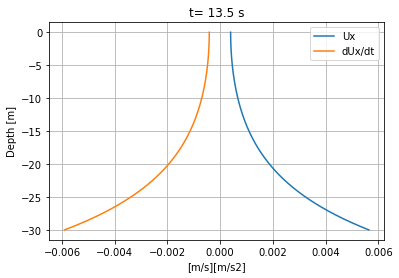

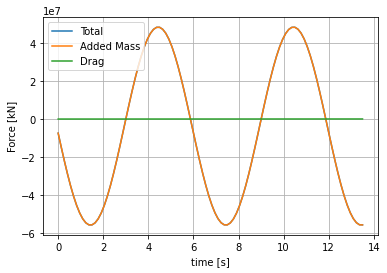

In [33]:
# Wave w**2=gk
f = 1./T # [Hz]
w = 2*3.14*f
k = w**2/g
A = H/2.
CA = 3.14*d1**2.

print('frequency:', f)
print('Omega:', w)
print('Wave Number:', k)
print('Cross section:', CA)

x = 0.
z, dz = np.linspace(0.0, depth, num=200, retstep=True)
time = np.linspace(0.0, 2.25*T, num=100)

# velocity in x
dA = dz*d

# Morison equation
def MORISON_fixed(C_m, A, dz, ro, dV, C_d, dA, V):
    dF_m = C_m*A*dz*ro*dV
    dF_d = 0.5*C_d*ro*dA*V**2.
    dF = dF_m + dF_d 
    return dF, dF_m, dF_d

F, F_m, F_d = 0, 0, 0
F_t, Fm_t, Fd_t = [], [], []

for t in time:
    V  = A*w*np.cosh(k*(z))/np.sinh(k*depth)*np.cos(k*x-w*t)
    dV = -A*w**2*np.cosh(k*(z))/np.sinh(k*depth)*np.cos(k*x-w*t)
    for dz in z:
        dF, dF_m, dF_d = MORISON_fixed(C_m, CA, dz, ro, dV, C_d, dA, V)
        F, F_m, F_d = F+dF, F_m+dF_m, F_d+dF_d
    F_t  += [float(F.sum())]
    Fm_t += [float(F_m.sum())]
    Fd_t += [float(F_d.sum())]

print('The total force is', np.sum(F), 'N')
print(len(F_t))
plt.title('t= {} s'.format(t))
plt.plot(V, -z, label= 'Ux')
plt.plot(dV, -z, label='dUx/dt')
plt.legend()
plt.xlabel('[m/s][m/s2]')
plt.ylabel('Depth [m]')
plt.grid()
plt.show()

F_t, Fm_t, Fd_t = np.array(F_t), np.array(Fm_t), np.array(Fd_t)
plt.plot(time, F_t/1000. , label='Total')
plt.plot(time, Fm_t/1000., label='Added Mass')
plt.plot(time, Fd_t/1000., label='Drag')
plt.ylabel('Force [kN]')
plt.xlabel('time [s]')
plt.legend()
plt.grid()
plt.show()

In [4]:
### ANSWERS ###

# horizontal force


# Inertia, Drag qnd Total Force plotting
F.sum()

1.148135073561178e+23

## Question 2
Calculate the moment at the mudline.

In [5]:
# Moment at the mudline